In [56]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# package that performs scraping of genius website to obtain lyrics and meta data
from lyricsgenius import Genius
import pandas as pd
#config file with token from genius
import config
token = config.lyricsgenius['token']
genius = Genius(token)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

In [57]:

# Remove section headers (e.g. [Chorus]) from lyrics when searching
genius.remove_section_headers = True
# Exclude songs with these words in their title
genius.excluded_terms = ["(Remix)", "(Live)"]

In [91]:
# Importing artists in cluster
artist_cluster_1 = pd.read_csv('../data/clusters/uri_map_1st_cluster.csv')
artist_cluster_1.head()

,uri,name,iso_nn6_nc2_1,iso_nn6_nc2_2,se_nn6_nc2_1,se_nn6_nc2_2,km_nn6_nc2,iso_nn9_nc3_1,iso_nn9_nc3_2,iso_nn9_nc3_3,se_nn9_nc3_1,se_nn9_nc3_2,se_nn9_nc3_3,km_nn9_nc3
0,spotify:artist:001aJOc7CSQVo3XzoLG4DK,One Way,1.947724,0.381297,0.011542,-0.005389,5,-1.013131,-0.521066,0.532044,0.011542,-0.005389,-0.014752,5
1,spotify:artist:00tVTdpEhQQw1bqdu8RCx2,Blue Öyster Cult,-0.371263,-0.298362,-0.011971,0.000754,0,-0.941251,-0.053596,0.484134,-0.011971,0.000754,-0.004029,0
2,spotify:artist:01Ppu7N8uYJI8SAONo2YZA,Melissa Etheridge,-1.574281,-1.279214,-0.013082,0.001587,0,-0.749857,-0.253648,-1.141207,-0.013082,0.001587,0.053016,0
3,spotify:artist:01W8kYNqFHyKicPfR0pLwO,England Dan & John Ford Coley,-1.479115,-2.381933,-0.011531,0.000668,4,-1.899376,-2.130514,-1.088571,-0.011531,0.000668,-0.002429,4
4,spotify:artist:01Wck2m10xhdxUrLaMq60y,Rene & Angela,1.986850,0.062321,0.012193,-0.005265,5,-0.556372,-0.860712,0.506586,0.012193,-0.005265,-0.013879,5


In [94]:
top_5 = artist_cluster_1.name[:5]

In [59]:
artist_list = set(artist_cluster_1.name)
len(artist_list)

764

In [101]:
def get_lyrics(name, k):
    c = 0
    # for name in arr:
    try:
        songs = (genius.search_artist(name, k, sort='popularity')).songs
        s = [song.lyrics for song in songs]
        # file.write("\n \n   <|endoftext|>   \n \n".join(s))
        c += 1
        print(f"Songs grabbed:{len(s)}")
        return s
    except:
        print(f"some exception at {name}: {c}")
    

In [102]:
songs = [get_lyrics(artist, 2) for artist in top_5]

Searching for songs by One Way...

Song 1: "Cutie Pie"


In [97]:
len(songs)

5

In [98]:
# Joining all songs in 1 block of text
text = " ".join([str(item) for item in songs])

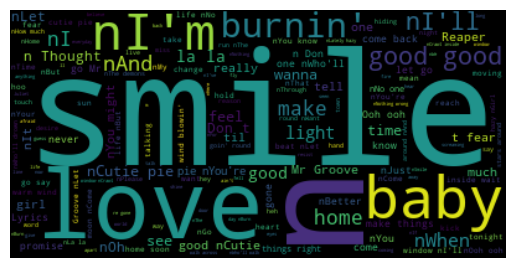

In [99]:
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('../output/wordcloud_1st_cluster.png')
plt.show()

------